# Qiskit Innovator Program : Quantum Random Number Generator
Implemented by Carin Samer - Faculty of Engineering Alexandria University



## Simple Summary
First , the project starts by allowing the user to select the number of qubits , each qubit you add  doubles the number of the possible unique outcomes, where each qubit is initialized at |0} state and then H gate . Then , the circuit is measured , it collapses to one of the possible states. Here comes the random number extraction where Qiskit's Aer simulator is used , where measurements are take from a quantum register to classical bits, and then this binary string is converted into an integer

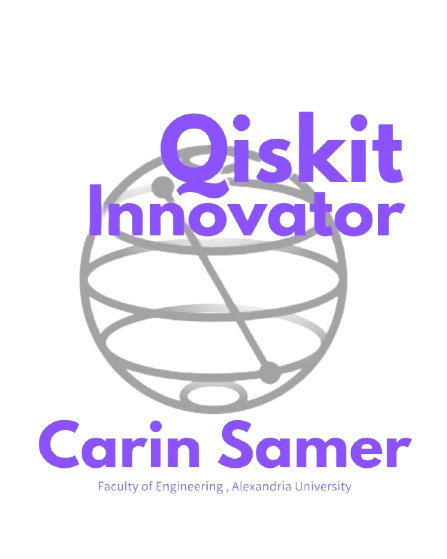

Here, we start by installing qiskit and qiskit Aer Simulator required for the extraction of the number.

In [2]:
!pip install qiskit
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 99.7 MB/s eta 0:00:00


Importing the required libraries

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

In [4]:
class QRNG:


    def __init__(self, num_qubits):

        self.num_qubits = num_qubits
        self.num_outcomes = 2 ** num_qubits

    def create_circuit(self):


        qr = QuantumRegister(self.num_qubits, 'q')
        cr = ClassicalRegister(self.num_qubits, 'c')
        circuit = QuantumCircuit(qr, cr)


        for qubit in range(self.num_qubits):
            circuit.h(qubit)


        circuit.measure(qr, cr)

        return circuit

    def run_qrng(self, shots=1):

        circuit = self.create_circuit()


        simulator = AerSimulator()


        job = simulator.run(circuit, shots=shots)
        result = job.result()
        counts = result.get_counts(circuit)

        if shots == 1:

            binary_string = list(counts.keys())[0]
            random_number = int(binary_string, 2)
            return random_number, counts
        else:

            max_count_key = max(counts, key=counts.get)
            random_number = int(max_count_key, 2)
            return random_number, counts

    def visualize_circuit(self):
        circuit = self.create_circuit()
        return circuit.draw(output='text')


def demonstrate_qrng():


    print("=" * 60)
    print("Quantum Random Number Generator (QRNG) - IBM Qiskit")
    print("=" * 60)
    print()


    print("Example 1: 3-qubit QRNG (Range: 0-7)")
    print("-" * 60)
    qrng_3 = QRNG(num_qubits=3)


    random_num, dist = qrng_3.run_qrng(shots=1)
    print(f"Single shot random number: {random_num}")
    print()


    random_num, distribution = qrng_3.run_qrng(shots=100)
    print(f"100 shots - Most common result: {random_num}")
    print(f"Distribution: {distribution}")
    print()


    print("Quantum Circuit:")
    print(qrng_3.visualize_circuit())
    print()


    print("=" * 60)
    print("Example 2: 5-qubit QRNG (Range: 0-31)")
    print("-" * 60)
    qrng_5 = QRNG(num_qubits=5)


    print("Generating 10 random numbers:")
    for i in range(10):
        random_num, _ = qrng_5.run_qrng(shots=1)
        print(f"  #{i+1}: {random_num}")
    print()


    print("=" * 60)
    print("Example 3: Testing uniformity (2-qubit, 1000 shots)")
    print("-" * 60)
    qrng_2 = QRNG(num_qubits=2)
    _, distribution = qrng_2.run_qrng(shots=1000)

    print("Expected: ~250 counts per outcome (25%)")
    print("Actual distribution:")
    for binary_str, count in sorted(distribution.items()):
        decimal = int(binary_str, 2)
        percentage = (count / 1000) * 100
        print(f"  {decimal} (binary: {binary_str}): {count} counts ({percentage:.1f}%)")
    print()



if __name__ == "__main__":

    demonstrate_qrng()


    print("=" * 60)
    print("Custom Usage Example")
    print("-" * 60)


    my_qrng = QRNG(num_qubits=4)


    random_number, measurements = my_qrng.run_qrng(shots=100)

    print(f"Random number generated: {random_number}")
    print(f"Range: 0-{my_qrng.num_outcomes - 1}")
    print(f"Total possible outcomes: {my_qrng.num_outcomes}")
    print()

    print("=" * 60)
    print("Practical Applications:")
    print("-" * 60)
    print("1. Cryptography: Generate truly random encryption keys")
    print("2. Gaming: Fair dice rolls and random events")
    print("3. Simulations: Monte Carlo methods with true randomness")
    print("4. Security: Random password generation")
    print("5. Lottery systems: Unpredictable number selection")
    print("=" * 60)

Quantum Random Number Generator (QRNG) - IBM Qiskit

Example 1: 3-qubit QRNG (Range: 0-7)
------------------------------------------------------------
Single shot random number: 0

100 shots - Most common result: 4
Distribution: {'110': 10, '101': 14, '100': 15, '000': 10, '010': 14, '001': 12, '111': 11, '011': 14}

Quantum Circuit:
     ┌───┐┌─┐      
q_0: ┤ H ├┤M├──────
     ├───┤└╥┘┌─┐   
q_1: ┤ H ├─╫─┤M├───
     ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─╫──╫─┤M├
     └───┘ ║  ║ └╥┘
c: 3/══════╩══╩══╩═
           0  1  2 

Example 2: 5-qubit QRNG (Range: 0-31)
------------------------------------------------------------
Generating 10 random numbers:
  #1: 8
  #2: 17
  #3: 1
  #4: 20
  #5: 9
  #6: 29
  #7: 19
  #8: 11
  #9: 24
  #10: 24

Example 3: Testing uniformity (2-qubit, 1000 shots)
------------------------------------------------------------
Expected: ~250 counts per outcome (25%)
Actual distribution:
  0 (binary: 00): 250 counts (25.0%)
  1 (binary: 01): 235 counts (23.5%)
  2 (binary: 10):